# ¿Qué es K-means? 

#### K-Means es uno de los algoritmos de clustering más populares. Su objetivo principal es particionar un conjunto de n observaciones en k clusters, donde cada observación pertenece al cluster cuyo centroide (o media) es el más cercano. 
#### Agrupa patrones sin etiquetas previas en K clústeres.
#### Cada patroón se asigna al clúster cuyo centro (centroide ) esté más cercano.
#### Su objetivo es minimizar la varianza intra-cúster.



## Se define como:

####  $$ J = \sum_{k=1}^{K} \sum_{\mathbf{x}_i \in S_k} ||\mathbf{x}_i - \boldsymbol{\mu}_k||^2 $$

Donde: 

$K$ es el número de clusters.
* $S_k$ es el conjunto de puntos de datos pertenecientes al cluster $k$.
* $\boldsymbol{\mu}_k$ es el centroide del cluster $S_k$.
* $||\mathbf{x}_i - \boldsymbol{\mu}_k||^2$ es el cuadrado de la distancia euclidiana entre el punto de datos $\mathbf{x}_i$ y el centroide $\boldsymbol{\mu}_k$ de su cluster asignado.


## Centroide: 
Son una medida de tendencia central. 
Al rededor de los centroides agrupamos patrones con características similares, el centroide representa la media de esas características similares

## Pasos para la implementación

### Importar las librerías básicas

In [7]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
  


### Creamos el Dataset sintético

### Parámetros make_blobs 
#### Utilizamos make_blobs para generar datos sintéticos y manipular sus características como las siguientes:


Número de puntos = n_samples=x.

Número de clusters (k) = centers=x.

cluster_std=0.50 = Desviación estándar de cada grupo.

random_state=52 = Semilla.

### Resultado
x: Una matriz de (n_samples,2) con los puntos generados.

y_true = Etiquetas verdaderas

In [8]:
x, y = make_blobs(n_samples=500, centers=4, cluster_std=0.70, random_state=34)

### Visualización de los datos
Creando una gráfica de dispersión para visualizar como están distribuidos los puntos antes de aplicar la técnica Kmeans.

C:\Users\csz11\AppData\Local\Temp\ipykernel_24804\1144853786.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:, 0], x[:, 1], s=30, cmap='viridis')


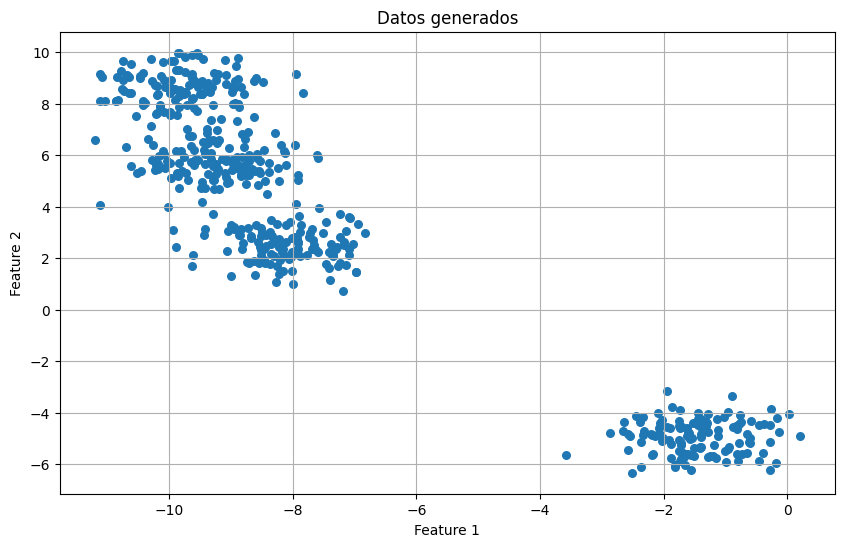

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], s=30, cmap='viridis')
plt.title('Datos generados')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Algoritmo Kmeans

Aplicación del algoritmo kmeans sobre los datos generados.

### Parámetros de usados en Kmeans

Los números de cluster que deseamos que identifique el algoritmo = n_cluster=x

Inicialización aleatoria de los centroides = random_state=34

Iteraciones = n_init

In [10]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=34)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
centroides = kmeans.cluster_centers_


#### Cuando se utiliza fit se obtiene lo siguiente:

1.- y_kmeans, que son las etiquetas asignadas por el modelo.

2.- centroids, que son las coordenadas de los centroides encontrados.

## Fórmula de la Inercia en K-means

$$
\text{Inercia} = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

---

## En donde

- **\(K\)**: Número total de clústeres definidos por el algoritmo.
- **\(C_i\)**: Conjunto de puntos asignados al clúster número \(i\).
- **\(x\)**: Un punto de datos dentro del clúster \(C_i\).
- **\(\mu_i\)**: Centroide del clúster \(i\), es decir, el promedio de los puntos del grupo.
- **\(\|x - \mu_i\|^2\)**: Distancia euclidiana al cuadrado entre el punto \(x\) y su centroide \(\mu_i\).

---

##  ¿Qué es y qué hace la inercia?

- La **inercia** mide la **compactación** de los clústeres.
- Es la **suma total de las distancias al cuadrado** de los puntos respecto a sus respectivos centroides.

- Inercia baja: los datos están muy cerca de sus centroides = clústeres compactos.

- Inercia alta: los datos están dispersos = clústeres poco definidos.



### Visualización de los datos post Kmeans

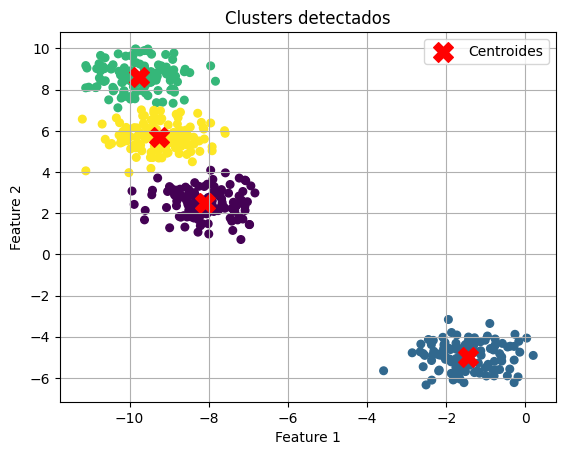

In [11]:
plt.Figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title('Clusters detectados')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()

### Reporte de Kmeans

#### Métricas de reporte

1.Inercia: La suma total de las distancias al cuadrado entre cada punto de datos y su centroide correspondiente.

2.Separación de los clústeres (silhouette score): Qué tan bien se separan los clusterés entre sí y qué tan compactos son internamente (más cercano a 1 es mejor).

3.-Similitud entre los clusters (Davies-Bouldin I.): Mide la similitud entre los clusters y qué tan dispersos son internamente (más bajo es mejor).

4.Centroides: Los puntos centrales de cada clúster.

In [14]:
from sklearn .metrics import silhouette_score, davies_bouldin_score
inercia = kmeans.inertia_
silhouette = silhouette_score(x, y_kmeans)
davies_bouldin = davies_bouldin_score(x, y_kmeans)

# Reporte
print("KMmeans")
print(f"Inercia: {inercia:.2f}")
print(f"Separación: {silhouette:.4f}")
print(f"Similitud: {davies_bouldin:.4f}  \n")

print("Centroides:")
for i, centroide in enumerate(centroides):
    print(f"  Clúster {i + 1}: {np.round(centroide, 2)}")


KMmeans
Inercia: 442.49
Separación: 0.6761
Similitud: 0.4484  

Centroides:
  Clúster 1: [-8.1   2.48]
  Clúster 2: [-1.46 -4.96]
  Clúster 3: [-9.76  8.63]
  Clúster 4: [-9.25  5.7 ]
